In [6]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import optimization as op
from tqdm import tqdm

In [13]:
def softmax(v, temp=1.):
    sm = nn.Softmax(dim=0)
    return sm(v / temp)

In [3]:
def classify(x, phi, temp=0.02):
    return softmax( phi @ x , temp=temp)

def cost(x, x_hat):
    return torch.norm(x - x_hat) ** 2

def agent_reward(u, phi, x, x_hat, temp):
    return u @ classify(x_hat, phi, temp=temp) - cost(x, x_hat)

def gragent(X, phi, b, u, temp=0.02, attempts=5, iters=300):
    m, d = phi.shape
    best_reward = agent_reward(u, phi, x=X, x_hat=X, temp=temp)
    best_X_hat = X.clone()
    for _ in range(attempts):
        X_hat = torch.rand(d)
        X_hat.requires_grad_(True)
        optimizer = torch.optim.SGD([X_hat], lr=0.01, momentum=0.9)
        for _ in range(iters):
            optimizer.zero_grad()
            loss = -agent_reward(u, phi, X, X_hat, temp)
            loss.backward()
            optimizer.step()
        if loss < -best_reward:
            best_reward = -loss.detach()
            best_X_hat = X_hat.detach()
    return best_X_hat

In [4]:
m = 2
d = 2
n = 1_000

In [5]:
dataset = torch.rand((n, d))
one_m = torch.ones(m)
funky_x = torch.tensor([0.1973, 0.1258])
W = torch.tensor([[0.8385, 0.5451], [0.7961, 0.9919]])
phi = torch.tensor([[0.5595, 0.0952], [0.1264, 0.7859]])
b = torch.zeros(m)
u = torch.tensor([0.15, 0.1])
# u = torch.tensor([0.2, 0.1])

In [12]:
x_hat = torch.stack([gragent(x, phi, b, u, attempts=2, iters=200) for x in tqdm(dataset, position=0, leave=True)])

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Users\Alex\AppData\Local\Temp\ipykernel_41960\4271027269.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return sm(v / temp)
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:31<00:00,  2.55it/s]


In [15]:
actions = torch.stack([classify(x, phi) for x in x_hat]).T # / torch.norm(phi @ x_hat.T, dim=0)
orig_actions = torch.stack([classify(x, phi) for x in dataset]).T # / torch.norm(phi @ dataset.T, dim=0)
dist = torch.norm(x_hat - dataset, dim=1)
actions_clf = torch.tensor([(actions[0,i] > actions[1,i]).item() for i in range(actions.shape[1])])

In [16]:
torch.sort(dist)

torch.return_types.sort(
values=tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        

In [17]:
torch.sort(u @ orig_actions)

torch.return_types.sort(
values=tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        

In [18]:
not_crazy = [d < 0.3 for d in dist]
normal_dist = dist[not_crazy]
normal_x = dataset[not_crazy]

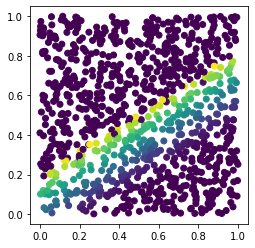

In [19]:
plt.gca().set_aspect('equal')
plt.scatter(normal_x[:,0], normal_x[:,1], c=normal_dist.detach().numpy())

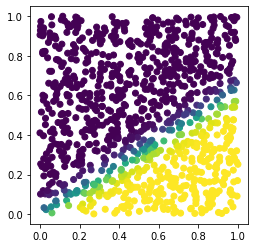

In [20]:
plt.gca().set_aspect('equal')
# plt.scatter(normal_x[:,0], normal_x[:,1], c=normal_dist.detach().numpy())
plt.scatter(normal_x[:,0], normal_x[:,1], c=(u @ orig_actions[:,not_crazy]).detach())
# plt.scatter(normal_x[:,0], normal_x[:,1], c=actions_clf[not_crazy])

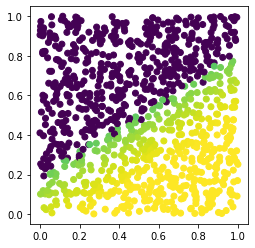

In [21]:
plt.gca().set_aspect('equal')
plt.scatter(normal_x[:,0], normal_x[:,1], c=(u @ actions[:,not_crazy]).detach())

[0.485493540763855, 0.26365649700164795] tensor(0.1003) tensor(0.1272) tensor(0.1609) tensor(0.0129)


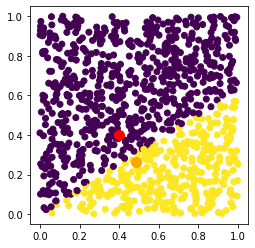

In [22]:
plt.gca().set_aspect('equal')
plt.scatter(dataset[:,0], dataset[:,1], c=[a[0] > a[1] for a in orig_actions.T])
x_new = torch.tensor([0.4, 0.4])
x_prime = gragent(x_new, phi, b, u).detach()
print(x_prime.tolist(), 
      u @ classify(x_new, phi), 
      u @ classify(x_prime, phi) - 0.5 * torch.norm(x_new - x_prime) ** 2,
      torch.norm(x_new - x_prime), 0.5 * torch.norm(x_new - x_prime) ** 2)
plt.plot(x_new[0], x_new[1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
plt.plot(x_prime[0], x_prime[1], marker="o", markersize=10, markeredgecolor="orange", markerfacecolor="orange")

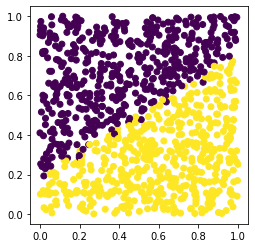

In [23]:
plt.gca().set_aspect('equal')
plt.scatter(dataset[:,0], dataset[:,1], c=[a[0] > a[1] for a in actions.T])

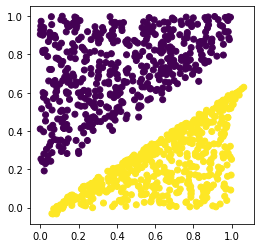

In [24]:
plt.gca().set_aspect('equal')
x_hat = x_hat.detach()
plt.scatter(x_hat[:,0], x_hat[:,1], c=[a[0] > a[1] for a in actions.T])